In [ ]:
!wget -O dark.jpg https://upload.wikimedia.org/wikipedia/commons/0/04/Fish_pond_od_skalica1_2.JPG
!wget -O bright.jpg https://media.healthplus.vn/Images/Uploaded/Share/2019/02/18/Ngam_nhung_hinh_anh_tuyet_dep_ve_Viet_Nam_tren_bao_Anh_01.jpg

In [145]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [146]:
class BrightMatching:
  def __init__(self):
    pass

  def get_histogram(self, gray_image):
    unique, count = np.unique(gray_image, return_counts=True)
    for i in range(256):
      if i not in unique:
        count = np.insert(count, i, 0)
    return count

  def histogram_matching(self, image, hist1, hist2):
    image = image.copy()

    new_H1 = np.array(list(map(lambda i: sum(hist1[:i+1]), range(256))))
    new_H2 = np.array(list(map(lambda i: sum(hist2[:i+1]), range(256))))
    # print(new_H1)
    # print(new_H2)

    translate = [0] * (256)
    for i in range(256):
      translate[i] = np.argmin(np.abs(new_H2 - new_H1[i]))
    # print(translate)
    image[:,:,2] = np.array(translate)[image[:,:,2]]
    return image

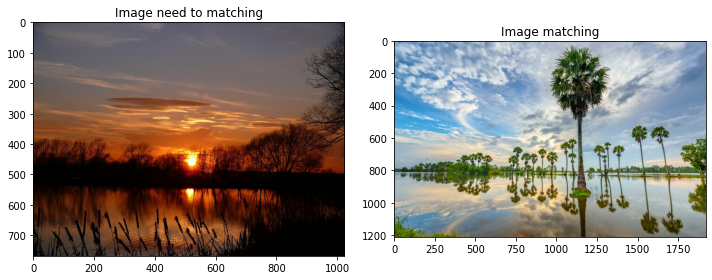

In [148]:
matcher = BrightMatching()

fig, ax = plt.subplots(1,2)
fig.set_size_inches(10,10)

dark_image = cv2.imread('dark.jpg')
total_dark_pixel = dark_image.shape[0] * dark_image.shape[1]
dark_image = cv2.cvtColor(dark_image, cv2.COLOR_BGR2RGB)
ax[0].imshow(dark_image)
ax[0].set_title('Image need to matching')

bright_image = cv2.imread('bright.jpg')
total_bright_pixel = bright_image.shape[0] * bright_image.shape[1]
bright_image = cv2.cvtColor(bright_image, cv2.COLOR_BGR2RGB)
ax[1].imshow(bright_image)
ax[1].set_title('Image matching')

fig.tight_layout()

In [149]:
dark_image = cv2.cvtColor(dark_image, cv2.COLOR_RGB2HSV)
bright_image = cv2.cvtColor(bright_image, cv2.COLOR_RGB2HSV)

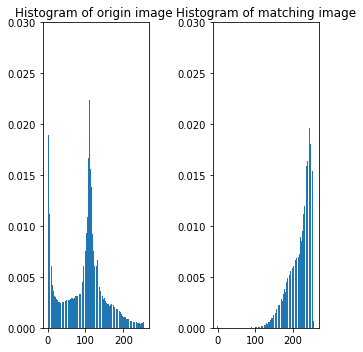

In [150]:
dark_histogram = matcher.get_histogram(dark_image[:,:,2]) / total_dark_pixel
bright_histogram = matcher.get_histogram(bright_image[:,:,2]) / total_bright_pixel

fig, ax = plt.subplots(1,2)
fig.set_size_inches(5,5)

ax[0].bar(range(256), dark_histogram)
ax[0].set_title('Histogram of origin image ')
ax[0].set_ylim(0, 0.03)
ax[1].bar(range(256), temp_histogram)
ax[1].set_title('Histogram of matching image')
ax[1].set_ylim(0, 0.03)

plt.tight_layout()

In [151]:
ret_image = matcher.histogram_matching(dark_image, dark_histogram, bright_histogram)
ret_image = cv2.cvtColor(ret_image, cv2.COLOR_HSV2RGB)
image = cv2.cvtColor(dark_image, cv2.COLOR_HSV2RGB)
ret_hist = matcher.get_histogram(ret_image) / total_dark_pixel

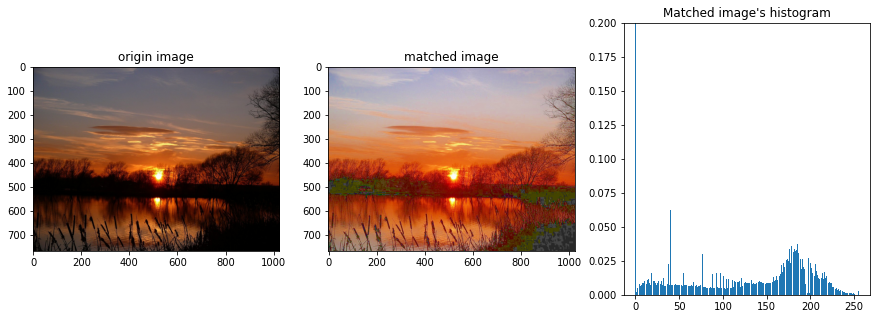

In [161]:
fig,ax = plt.subplots(1, 3)
fig.set_size_inches(15,5)
ax[0].imshow(image)
ax[0].set_title('origin image')
ax[1].imshow(ret_image)
ax[1].set_title('matched image')

ax[2].bar(range(256), ret_hist)
ax[2].set_ylim(0,0.2)
ax[2].set_title("Matched image's histogram")
fig.show()